**Brian Blaylock**  
*December 14, 2020*

# 👨🏻‍🏫 Plot HRRR data on a cartopy map wtih `common_features`
I wrote my `common_features` function to help with creating a cartopy axes and adding common cartopy features to a map. It really comes in handy.

<div class="alert alert-block alert-warning">
    <h3>Quick note on pcolormesh's `shading` argument</h3>
Matplotlib's pcolormesh has a shading argument, and the default behavior is changing. <b>Read about it <a href='https://matplotlib.org/3.3.3/gallery/images_contours_and_fields/pcolormesh_grids.html'>here</a></b>. For the geophysical data like the HRRR data we are working with here, it is correct to use the <code>shading='nearest'</code> as the argument. This centers the colored data box on the lat/lon point it represents (rather than putting a the lat/lon point on the lower left corner of the colored box).

You can do this two ways: Set the rc.parameter at the top of your script

```python
plt.rcParams['pcolor.shading'] = 'nearest'
```

or specify in the call to pcolormesh

```python
plt.pcolormesh(X, Y, C, shading='nearest')
```
<br>
There is option for <code>'auto'</code> that will handle both, so probably should use 'auto'
    
</div>


In [2]:
import hrrrb.archive as hb   # HRRRb archive download

from toolbox.cartopy_tools_OLD import common_features, pc, domain_border

#from hrrrb.plots import domain_border

import matplotlib.pyplot as plt

# Set the pcolormesh shading default to auto, so that pcolormesh boxes are centered on the lat/lon point
plt.rcParams['pcolor.shading'] = 'auto'

KeyError: 'pcolor.shading is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

Download some HRRR data. Let's look at composite reflectivity

In [2]:
H = hb.xhrrr('2020-12-14', 'REFC:entire')

💡 Info: Downloading [1] GRIB2 files

Download subset from [nomads]:
✅ Success! Searched for [REFC:entire] and got [1] GRIB fields and saved as /p/home/blaylock/data/hrrr/20201214/subset_20201214_hrrr.t00z.wrfsfcf00.grib2
🚛💨 Download Progress: [1/1 completed] >> Est. Time Remaining 0:00:00         


🍦 Finished 🍦  Time spent on download: 0:00:01.894880


---
What does the data look like when we plot it?

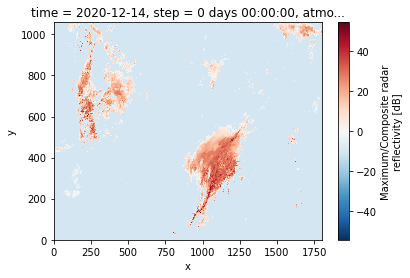

In [3]:
H.refc.plot()

Ok, but we really want to see this data on a map. Let's create a common map with `common_features` method from hrrrb.plots

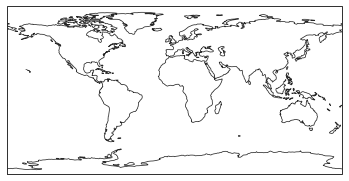

In [4]:
ax = common_features()

Notice that it gives us a Platte Carree map of the world. We can use this to plot our HRRR data onto

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


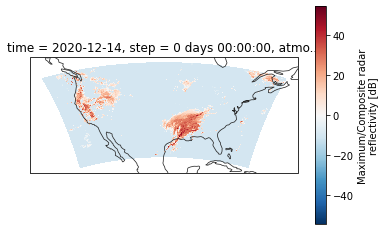

In [5]:
ax = common_features()
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

We can add other features, like states

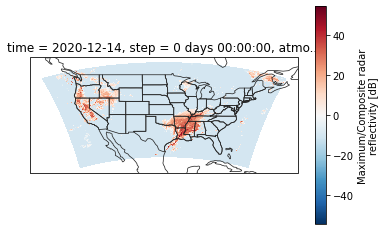

In [6]:
ax = common_features(STATES=True)
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

Since the `get_hrrr` function will get the HRRR coordinate reference system (crs), we can use that to create the map

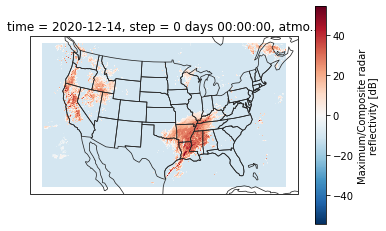

In [7]:
ax = common_features(STATES=True, projection=H.crs)
H.refc.plot(x='longitude', y='latitude', ax=ax, transform=pc)

Now, mask out the reflectivity values less than 0 and show some ocean and land cover

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


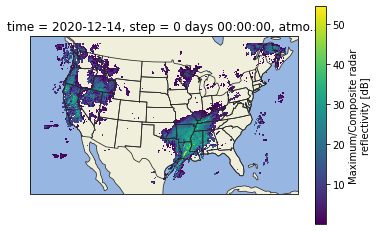

In [8]:
ax = common_features(STATES=True, OCEAN=True, LAND=True, projection=H.crs)
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc)

Zoom up on a region and show a Stamen map background

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


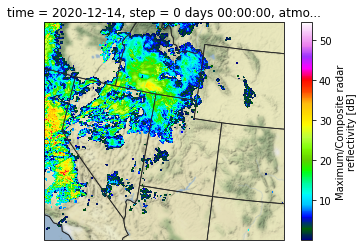

In [9]:
ax = common_features(STATES=True, STAMEN=True, projection=H.crs, STAMEN_kwargs={'zoom':5})
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
ax.set_extent([-120, -105, 35, 45], crs=pc)

Increase feature resolution, draw counties

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


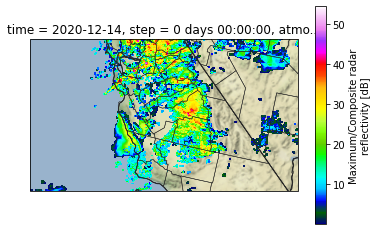

In [10]:
ax = common_features('50m', STATES=True, STAMEN=True, COUNTIES=True, projection=H.crs, STAMEN_kwargs={'zoom':5})
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
ax.set_extent([-125, -115, 35, 38], crs=pc)

Use `domain_border` (imported from hrrrb.plots), to show extent of domain (as cutout or simple border)

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


(<cartopy.mpl.feature_artist.FeatureArtist at 0x2ba1d4ff46d0>,
 <shapely.geometry.polygon.Polygon at 0x2ba32c5c1910>)

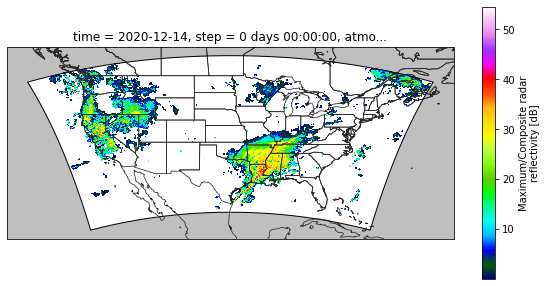

In [11]:
plt.figure(figsize=[10,5])
ax = common_features('50m', STATES=True)
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
domain_border(H, ax=ax) # cutout is the default method

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


(<cartopy.mpl.feature_artist.FeatureArtist at 0x2ba32c5482d0>,
 <shapely.geometry.polygon.Polygon at 0x2ba32c54aed0>)

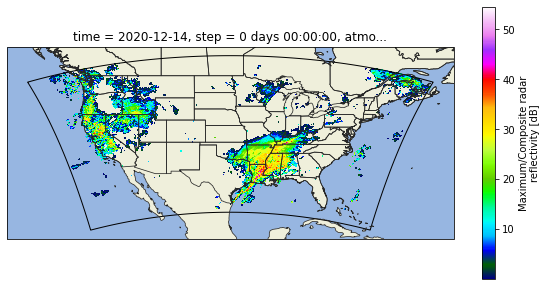

In [12]:
plt.figure(figsize=[10,5])
ax = common_features('50m', STATES=True, OCEAN=True, LAND=True)
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')
domain_border(H, ax=ax, method='border')

You can modify each feature arguments with kwargs, e.g, ocean color and states line color

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


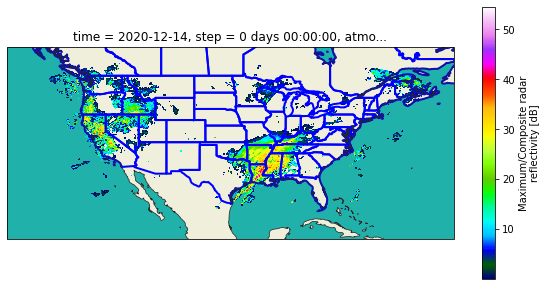

In [13]:
plt.figure(figsize=[10,5])
ax = common_features('50m', STATES=True, OCEAN=True, LAND=True,
                     OCEAN_kwargs=dict(color='lightseagreen'),
                     STATES_kwargs=dict(edgecolor='b', linewidth=2),
                     )
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar')

There is even a preset kwarg default for "Dark Theme" if you use `dark_theme=True`

/p/home/blaylock/anaconda3/envs/basic/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


(<cartopy.mpl.feature_artist.FeatureArtist at 0x2ba334633410>,
 <shapely.geometry.polygon.Polygon at 0x2ba3243c79d0>)

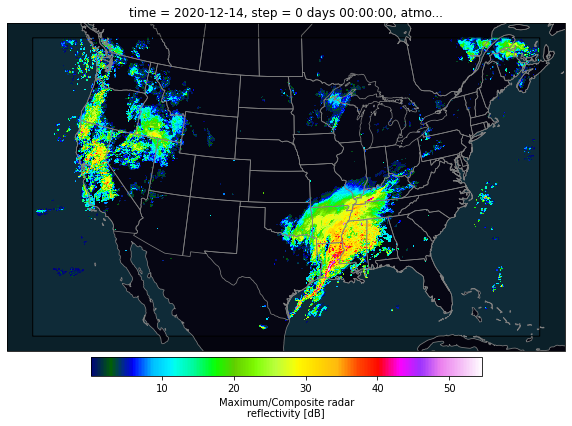

In [14]:
plt.figure(figsize=[10,10])
ax = common_features('50m', STATES=True, OCEAN=True, LAND=True, dark_theme=True, projection=H.crs)
H.refc.where(H.refc>0).plot(x='longitude', y='latitude', ax=ax, transform=pc, cmap='gist_ncar',
                            cbar_kwargs=dict(orientation='horizontal', shrink=.7, pad=0.01))
domain_border(H, ax=ax)

----
## A side notes on the pcolormesh shading style

Let's look and see how the pcolormesh `shading='auto'` is behaving for a section of the map. We expect the boxes will be centered on the lat/lon points, and we indeed see that is true below...(alpha is set to less than 1 just to show edge boundaries)

Gouraud shading is another possibility shading method, and could be visually appealing, but does not show the explicit value at each point

Text(0.5, 1.0, 'shading="gouraud"')

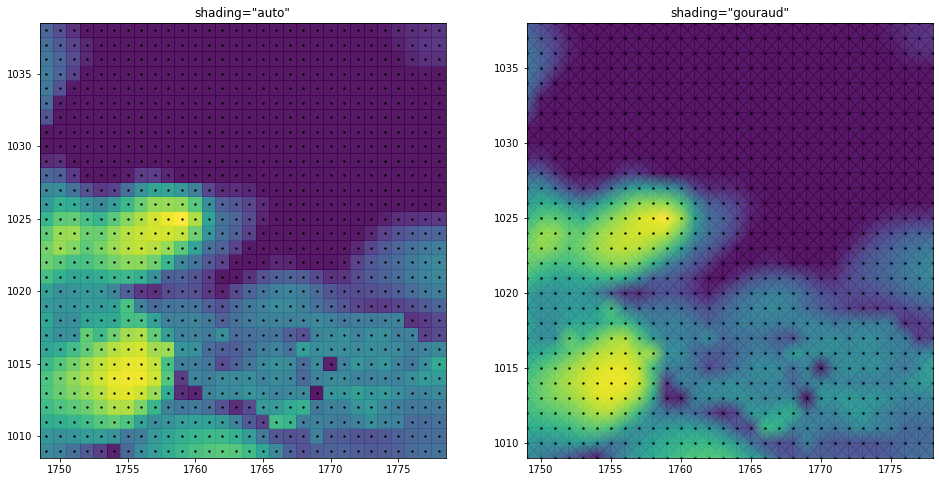

In [53]:
import numpy as np
a = slice(-50,-20)

fig, axes = plt.subplots(1,2, figsize=[16,8])

axes[0].pcolormesh(*np.meshgrid(H.x[a], H.y[a]), H.refc[a,a], alpha=.9)
axes[0].scatter(*np.meshgrid(H.x[a], H.y[a]), marker='.', s=7, color='k')
axes[0].set_title('shading="auto"')

axes[1].pcolormesh(*np.meshgrid(H.x[a], H.y[a]), H.refc[a,a], alpha=.9, shading='gouraud')
axes[1].scatter(*np.meshgrid(H.x[a], H.y[a]), marker='.', s=7, color='k')
axes[1].set_title('shading="gouraud"')